# Data Visualization

## Objectives
  - Create Data Visualization with Python
  - Use various Python libraries for visualization

### Exploring dataset

Dataset Source: https://www.un.org/en/development/desa/population/migration/data/empirical2/migrationflows.asp

The dataset contains annual data on the flows of international immigrants as recorded by the countries of destination. The data presents both inflows and outflows according to the place of birth, citizenship or place of previous / next residence both for foreigners and nationals. The current version presents data pertaining to 45 countries.

Here, we will focus on the Canadian immigration data.

In [1]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

Let's download and import our primary Canadian Immigration dataset using pandas **read_excel() method**. Normally, before we can do that, we would need to download a module which pandas requires to read in excel files.**This module is xlrd.**

**Canadian Immigration data** was downloaded from IBM Course Data visualisation with Python

In [2]:
df_can = pd.read_excel('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx',
                        sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [3]:
# top 5 rows of data
print(df_can.head())

# last 5 rows of data
print(df_can.tail())

         Type    Coverage          OdName  AREA AreaName   REG  \
0  Immigrants  Foreigners     Afghanistan   935     Asia  5501   
1  Immigrants  Foreigners         Albania   908   Europe   925   
2  Immigrants  Foreigners         Algeria   903   Africa   912   
3  Immigrants  Foreigners  American Samoa   909  Oceania   957   
4  Immigrants  Foreigners         Andorra   908   Europe   925   

           RegName  DEV             DevName  1980  ...  2004  2005  2006  \
0    Southern Asia  902  Developing regions    16  ...  2978  3436  3009   
1  Southern Europe  901   Developed regions     1  ...  1450  1223   856   
2  Northern Africa  902  Developing regions    80  ...  3616  3626  4807   
3        Polynesia  902  Developing regions     0  ...     0     0     1   
4  Southern Europe  901   Developed regions     0  ...     0     0     1   

   2007  2008  2009  2010  2011  2012  2013  
0  2652  2111  1746  1758  2203  2635  2004  
1   702   560   716   561   539   620   603  
2  3623 

**When analyzing a dataset, it's always a good idea to start by getting basic information about your dataframe. We can do this by using the info() method.**

**This method can be used to get a short summary of the dataframe.**

In [4]:
df_can.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Columns: 43 entries, Type to 2013
dtypes: int64(37), object(6)
memory usage: 65.6+ KB


In [5]:
#list of column headers we can call upon the dataframe's .columns parameter.
df_can.columns.values

array(['Type', 'Coverage', 'OdName', 'AREA', 'AreaName', 'REG', 'RegName',
       'DEV', 'DevName', 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013], dtype=object)

In [6]:
#to get the list of indicies we use the .index parameter.
df_can.index.values

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [7]:
# default type of index and column
print(type(df_can.columns))
print(type(df_can.index))

<class 'pandas.core.indexes.base.Index'>
<class 'pandas.core.indexes.range.RangeIndex'>


In [8]:
# to get index and column as lits
print(type(df_can.columns.tolist()))
print(type(df_can.index.tolist()))

<class 'list'>
<class 'list'>


In [9]:
# dimension of dataframe
df_can.shape

(195, 43)

In [10]:
# Removing unnecessary columns
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_can.head(2)

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603


In [11]:
# Renaming the column names
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_can.columns

Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

In [12]:
df_can['Total'] = df_can.sum(axis=1)

In [13]:
# Checking the null in dataset
df_can.isnull().sum()

Country      0
Continent    0
Region       0
DevName      0
1980         0
1981         0
1982         0
1983         0
1984         0
1985         0
1986         0
1987         0
1988         0
1989         0
1990         0
1991         0
1992         0
1993         0
1994         0
1995         0
1996         0
1997         0
1998         0
1999         0
2000         0
2001         0
2002         0
2003         0
2004         0
2005         0
2006         0
2007         0
2008         0
2009         0
2010         0
2011         0
2012         0
2013         0
Total        0
dtype: int64

In [14]:
# summary of each column
df_can.describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,508.394872,566.989744,534.723077,387.435897,376.497436,358.861538,441.271795,691.133333,714.389744,843.241026,...,1320.292308,1266.958974,1191.820513,1246.394872,1275.733333,1420.287179,1262.533333,1313.958974,1320.702564,32867.451282
std,1949.588546,2152.643752,1866.997511,1204.333597,1198.246371,1079.309600,1225.576630,2109.205607,2443.606788,2555.048874,...,4425.957828,3926.717747,3443.542409,3694.573544,3829.630424,4462.946328,4030.084313,4247.555161,4237.951988,91785.498686
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,1.000000,1.000000,...,28.500000,25.000000,31.000000,31.000000,36.000000,40.500000,37.500000,42.500000,45.000000,952.000000
50%,13.000000,10.000000,11.000000,12.000000,13.000000,17.000000,18.000000,26.000000,34.000000,44.000000,...,210.000000,218.000000,198.000000,205.000000,214.000000,211.000000,179.000000,233.000000,213.000000,5018.000000
75%,251.500000,295.500000,275.000000,173.000000,181.000000,197.000000,254.000000,434.000000,409.000000,508.500000,...,832.000000,842.000000,899.000000,934.500000,888.000000,932.000000,772.000000,783.000000,796.000000,22239.500000
max,22045.000000,24796.000000,20620.000000,10015.000000,10170.000000,9564.000000,9470.000000,21337.000000,27359.000000,23795.000000,...,42584.000000,33848.000000,28742.000000,30037.000000,29622.000000,38617.000000,36765.000000,34315.000000,34129.000000,691904.000000


In [15]:
# list of countries
df_can.Country

0         Afghanistan
1             Albania
2             Algeria
3      American Samoa
4             Andorra
            ...      
190          Viet Nam
191    Western Sahara
192             Yemen
193            Zambia
194          Zimbabwe
Name: Country, Length: 195, dtype: object

In [16]:
# List of countries and data for year 1980 - 1985
df_can[['Country',1980,1981,1982,1983,1984]]

,Country,1980,1981,1982,1983,1984
0,Afghanistan,16,39,39,47,71
1,Albania,1,0,0,0,0
2,Algeria,80,67,71,69,63
3,American Samoa,0,1,0,0,0
4,Andorra,0,0,0,0,0
...,...,...,...,...,...,...
190,Viet Nam,1191,1829,2162,3404,7583
191,Western Sahara,0,0,0,0,0
192,Yemen,1,2,1,6,0
193,Zambia,11,17,11,7,16


**'Country' is string, and the years are integers.**

In [17]:
# default index is numeric range
# Changing the index to country name
df_can.set_index('Country', inplace=True)
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


### Number of immigrants from *Japan*

In [18]:
# the full row data
df_can.loc['Japan']

Continent                 Asia
Region            Eastern Asia
DevName      Developed regions
1980                       701
1981                       756
1982                       598
1983                       309
1984                       246
1985                       198
1986                       248
1987                       422
1988                       324
1989                       494
1990                       379
1991                       506
1992                       605
1993                       907
1994                       956
1995                       826
1996                       994
1997                       924
1998                       897
1999                      1083
2000                      1010
2001                      1092
2002                       806
2003                       817
2004                       973
2005                      1067
2006                      1212
2007                      1250
2008                      1284
2009    

In [19]:
df_can[df_can.index == 'Japan'].T.squeeze()

Continent                 Asia
Region            Eastern Asia
DevName      Developed regions
1980                       701
1981                       756
1982                       598
1983                       309
1984                       246
1985                       198
1986                       248
1987                       422
1988                       324
1989                       494
1990                       379
1991                       506
1992                       605
1993                       907
1994                       956
1995                       826
1996                       994
1997                       924
1998                       897
1999                      1083
2000                      1010
2001                      1092
2002                       806
2003                       817
2004                       973
2005                      1067
2006                      1212
2007                      1250
2008                      1284
2009    

In [20]:
# Japan data for 2013
df_can.loc['Japan', 2013]

982

In [21]:
# Japan data for years 1980-85
df_can.loc['Japan',[1980,1981,1982,1983,1984,1985]]

1980    701
1981    756
1982    598
1983    309
1984    246
1985    198
Name: Japan, dtype: object

Column names that are integers (such as the years) might introduce some confusion. For example, when we are referencing the year 2013, one might confuse that when the 2013th positional index.

To avoid this ambuigity, let's convert the column names into strings: '1980' to '2013'.

In [22]:
df_can.columns = list(map(str, df_can.columns))

In [23]:
# Since we converted the years to string, let's declare a variable that will allow us to easily call upon the 
# full range of years:
years = list(map(str, range(1980, 2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

### Filtering based on the criteria

In [24]:
# 1. create the condition boolean series
condition = df_can['Continent'] == 'Asia'
print(condition)

Country
Afghanistan        True
Albania           False
Algeria           False
American Samoa    False
Andorra           False
                  ...  
Viet Nam           True
Western Sahara    False
Yemen              True
Zambia            False
Zimbabwe          False
Name: Continent, Length: 195, dtype: bool


In [25]:
# 2. pass this condition into the dataFrame
df_can[condition]

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Armenia,Asia,Western Asia,Developing regions,0,0,0,0,0,0,0,...,224,218,198,205,267,252,236,258,207,3310
Azerbaijan,Asia,Western Asia,Developing regions,0,0,0,0,0,0,0,...,359,236,203,125,165,209,138,161,57,2649
Bahrain,Asia,Western Asia,Developing regions,0,2,1,1,1,3,0,...,12,12,22,9,35,28,21,39,32,475
Bangladesh,Asia,Southern Asia,Developing regions,83,84,86,81,98,92,486,...,4171,4014,2897,2939,2104,4721,2694,2640,3789,65568
Bhutan,Asia,Southern Asia,Developing regions,0,0,0,0,1,0,0,...,5,10,7,36,865,1464,1879,1075,487,5876
Brunei Darussalam,Asia,South-Eastern Asia,Developing regions,79,6,8,2,2,4,12,...,4,5,11,10,5,12,6,3,6,600
Cambodia,Asia,South-Eastern Asia,Developing regions,12,19,26,33,10,7,8,...,370,529,460,354,203,200,196,233,288,6538
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962


In [26]:
# we can pass mutliple criteria in the same line. 
# let's filter for AreaNAme = Asia and RegName = Southern Asia

df_can[(df_can['Continent']=='Asia') & (df_can['Region']=='Southern Asia')]

# note: When using 'and' and 'or' operators, pandas requires we use '&' and '|' instead of 'and' and 'or'
# don't forget to enclose the two conditions in parentheses

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Bangladesh,Asia,Southern Asia,Developing regions,83,84,86,81,98,92,486,...,4171,4014,2897,2939,2104,4721,2694,2640,3789,65568
Bhutan,Asia,Southern Asia,Developing regions,0,0,0,0,1,0,0,...,5,10,7,36,865,1464,1879,1075,487,5876
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Maldives,Asia,Southern Asia,Developing regions,0,0,0,1,0,0,0,...,0,0,2,1,7,4,3,1,1,30
Nepal,Asia,Southern Asia,Developing regions,1,1,6,1,2,4,13,...,607,540,511,581,561,1392,1129,1185,1308,10222
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358


# Visualizing Data using Matplotlib<a id="8"></a>

In [27]:
# using the inline backend
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

### Question: Plot a line graph of immigration from Haiti using df.plot().

In [28]:
haiti = df_can.loc['Haiti',years]
haiti.head()

1980    1666
1981    3692
1982    3498
1983    2860
1984    1418
Name: Haiti, dtype: object

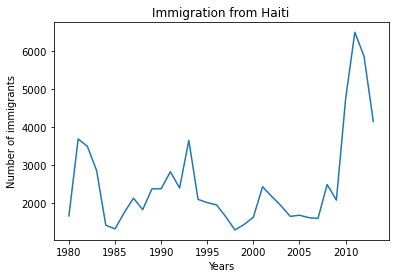

In [29]:
haiti.index = haiti.index.map(int) # let's change the index values of Haiti to type integer for plotting
haiti.plot(kind='line')

plt.title('Immigration from Haiti')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

plt.show() # need this line to show the updates made to the figure

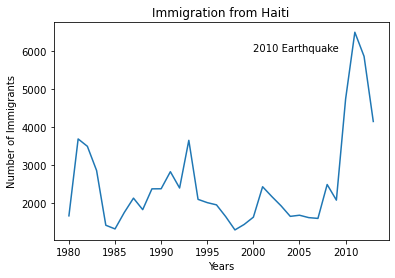

In [30]:
haiti.plot(kind='line')

plt.title('Immigration from Haiti')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

# annotate the 2010 Earthquake. 
# syntax: plt.text(x, y, label)
plt.text(2000, 6000, '2010 Earthquake') # see note below

plt.show() 

### Compare the number of immigrants from India and China from 1980 to 2013

In [31]:
#data set for China and India
df_CI = df_can.loc[['India','China'],years]
df_CI.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129


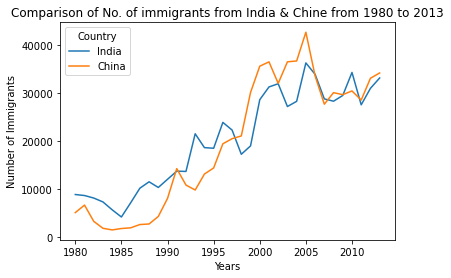

In [32]:
# pandas plots the indices on the x-axis and the columns as individual lines on the y-axis. 
# Since df_CI is a dataframe with the country as the index and years as the columns,
# we must first transpose the dataframe using transpose() method to swap the row and columns.
df_CI = df_CI.transpose()

df_CI.plot(kind='line')
plt.title('Comparison of No. of immigrants from India & Chine from 1980 to 2013')
plt.xlabel('Years')
plt.ylabel('Number of Immigrants')
plt.show()

### Compare the trend of top 5 countries that contributed the most to immigration to Canada

In [33]:
# sorting dataframe by total column
df_can.sort_values(by = 'Total',ascending = False, inplace = True)

In [34]:
# top 5 countries
df_top5 = df_can.head(5)
df_top5

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


In [35]:
# transpose the dataframe
df_top5 = df_top5[years].transpose()
df_top5.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


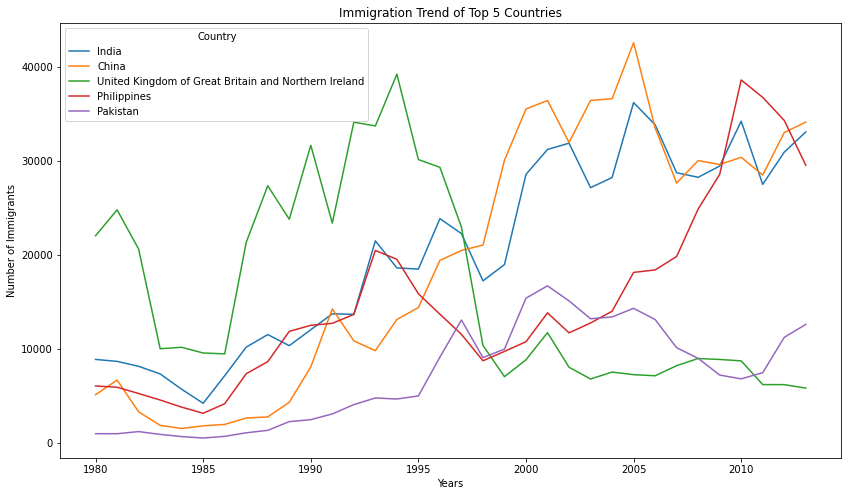

In [36]:
df_top5.plot(kind='line', figsize=(14, 8)) # pass a tuple (x, y) size
plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()